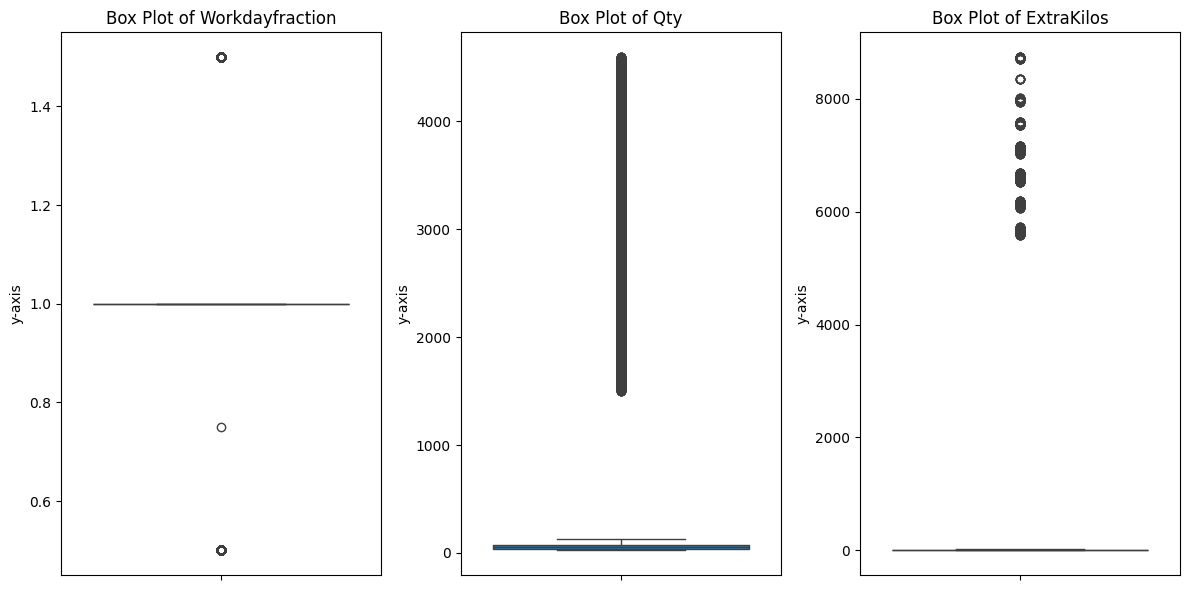

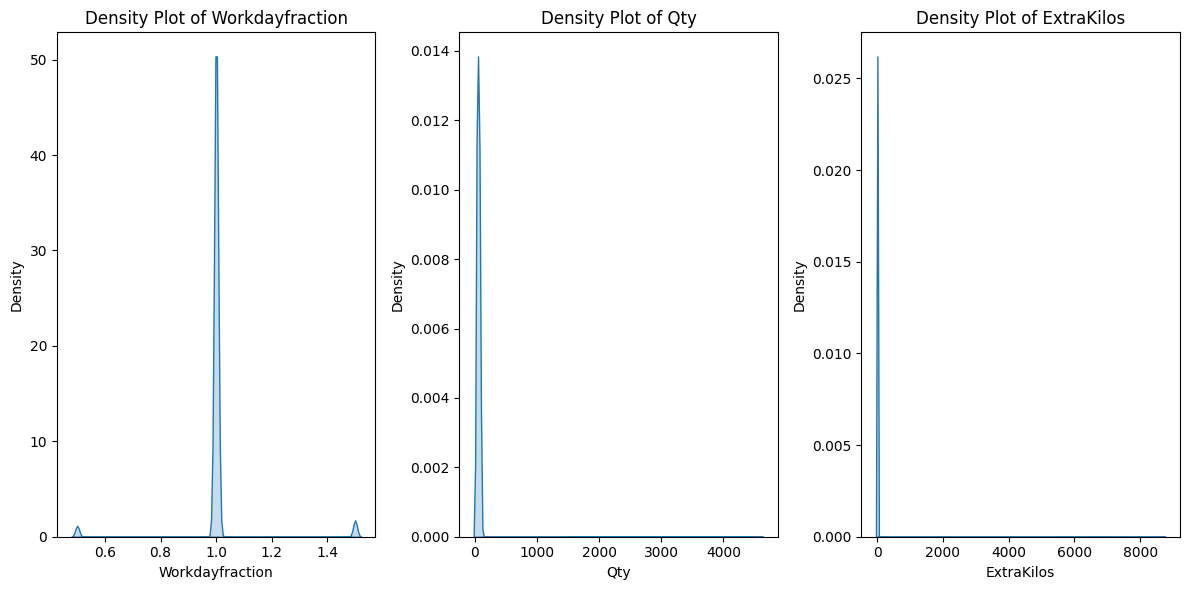

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset
df = pd.read_csv("data/Cleaned_WorkDetails.csv")

# Select numerical columns
numerical_columns = ["Workdayfraction", "Qty", "ExtraKilos"]

# Create box plots for numerical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot of {col}")
    plt.ylabel("y-axis")

plt.tight_layout()
plt.show()

# Create density plots for numerical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.kdeplot(data=df, x=col, fill=True)
    plt.title(f"Density Plot of {col}")

plt.tight_layout()
plt.show()

# Define a function to remove outliers using IQR
def remove_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Remove outliers from numerical columns
for col in numerical_columns:
    df = remove_outliers(df, col)

# Save the cleaned data to a new file
df.to_csv("data/Cleaned_WorkDetails_NoOutliers.csv", index=False)
